Para comparar los algoritmos de búsqueda informada conviene definir un problema que cuente con una función de costo. El problema que aquí definiremos es el problema del laberinto: que un agente, iniciando de un punto arbitrario de un mapa, pueda llegar a una meta o punto final marcado en el mapa; además, introducimos un nuevo factor para determinar el costo de cada acción en un estado dado. Este nuevo factor puede verse como el "tráfico": así, moverse a ciertas regiones del laberinto le costará más al agente que moverse hacia otras. En particular definimos 3 tipos de costo:

Tráfico pesado: son regiones en que el costo de moverse es de 3.
Tráfico ligero: son regiones en que el costo de moverse es de 2.
No tráfico: son regiones en el que el costo de moverse es de 1.
En una aplicación real, se podría considerar el promedio de tiempo de transitar por estas regiones, si se cuenta con esta información. En este caso simplificamos el proceso tomando en cuenta estos valores.

Para incluir el costo dentro del modelo simplemente definimos una función de costo que tome en cuenta estos valores de tráfico. Estos valores se toman de un mapa que representamos como cadena de texto; cada valor de tráfico se representa con un símbolo textual:

Tráfico pesado: símbolo '-' (guión)
Tráfico ligero: símbolo '.' (punto)
No tráfico: símbolo ' ' (espacio)

In [4]:
class Maze(object):
    """Simulador de laberinto"""
    def __init__(self, board):
        #Define el laberinto
        self.board = [list(x) for x in board.split("\n") if x]
        #Guardo el estado inicial
        self.goal = None

        for y in range(len(self.board)):
            for x in range(len(self.board[y])):
                if self.board[y][x] == 'o':
                    #El inicial es el estado con el símbolo 'o'
                    self.initial = (x,y)
                elif self.board[y][x] == 'x':
                    #La meta es el estado con el símbolo 'x'
                    self.goal = (x,y)

    def __str__(self):
        return '\n'.join([''.join(symbols) for symbols in self.board])

    def actions(self, state):
        """Define las posibles acciones permitidas en cada estado"""
        actions = []
        for action in ["up","down","left","right"]:
            newx, newy = self.result(state, action)
            #Una acción no permitida es aquella donde se
            #topa con un símbolo # que indica pared
            if self.board[newy][newx] != "#":
                actions.append(action)
        return actions

    def result(self, state, action):
        """Calcula el estado resultante de la acción"""
        x, y = state
        if action.count("up"):
            y -= 1
        if action.count("down"):
            y += 1
        if action.count("left"):
            x -= 1
        if action.count("right"):
            x += 1

        new_state = (x, y)
        return new_state

    def move(self, state, new_state, symbol='o'):
        """Cambia la posición del agente de un estado a otro"""
        x,y = state
        new_x, new_y = new_state
        if self.board[new_y][new_x] == ' ':
            self.board[y][x] = ' '
            self.board[new_y][new_x] = symbol
        else:
            pass

    def cost(self, prev, action, next, normal=' ',low='.',high='-'):
        """Función de costo con base en 'tráfico'"""
        res = self.board[next[1]][next[0]]
        #Situación de costo normal
        if res == normal:
            return 1
        #Tráfico ligero
        elif res == low:
            return 2
        #Tráfico alto
        elif res == high:
            return 3
        #Casos donde está el final
        else:
            return 0

    def draw(self, low='.', high='-'):
        """Dibuja el mapa"""
        import matplotlib.pyplot as plt
        import numpy as np

        img = np.ones((len(self.board), len(self.board[0]), 4))
        for i, row in enumerate(self.board):
            for j, element in enumerate(row):
                if element == '#':
                    img[i,j] = np.array([0,0,0,1])
                elif element == 'o':
                    img[i,j] = np.array([0.2,0.5,0.8,1])
                elif element == 'x':
                    img[i,j] = np.array([0.2,0.9,0.5,1])
                elif element == high:
                    img[i,j] = np.array([1,0.2,0.2,0.4])
                elif element == low:
                    img[i,j] = np.array([0.9,0.6,0.3,0.4])

        plt.imshow(img)
        plt.show()

    def is_goal(self, state):
        """Determina si un estado es meta"""
        return state == self.goal

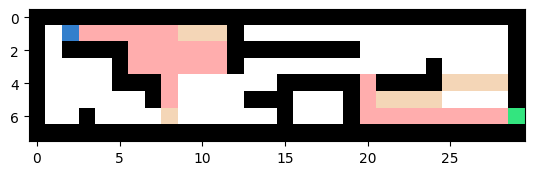

In [5]:
mapa = """
##############################
# o------...#                #
# ####------########         #
#    #------#           #    #
#    ###-      #####-####....#
#      #-    ###   #-....    #
#  #    .      #   #---------x
##############################
"""

ent = Maze(mapa)
ent.draw()

In [6]:
#Movimiento a la derecha
r_state = ent.result(ent.initial, "right")
print("Costo (derecha): {}".format(ent.cost(ent.initial, "right", r_state)))
#Movimiento a la izquierda
l_state = ent.result(ent.initial, "left")
print("Costo (izquierda): {}".format(ent.cost(ent.initial, "left", l_state)))

Costo (derecha): 3
Costo (izquierda): 1


##Algoritmo de búsqueda A∗

El algoritmo de A∗ es el algoritmo más reconocido dentro de la búsqueda heurística. Este algoritmo incorpora una heurística y la combina con la función de costo para buscar encontrar la solución óptima al problema. A diferencia del algoritmo de primero mejor ambicioso, el tomar en cuenta el costo va a permitir que la solución si sea óptima, **siempre y cuando se cumplan la condición de que la heurística sea admisible.**

En el contexto de búsqueda A*, la heurística de distancia euclidiana es una función estimativa que se utiliza para prever la distancia restante desde un nodo dado hasta el objetivo en un grafo o espacio de búsqueda. A* es un algoritmo de búsqueda informada que utiliza tanto el costo acumulado desde el inicio como la estimación heurística para seleccionar el próximo nodo a expandir.

La distancia euclidiana es una medida directa en línea recta entre dos puntos en un espacio tridimensional, y la heurística de distancia euclidiana en A* se basa en esta métrica. La fórmula para la distancia euclidiana entre dos puntos (x1, y1) y (x2, y2) en un plano cartesiano es:

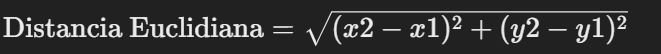


Esta heurística es admisible pues nunca sobre estima el costo óptimo del camino. Esto es fácil de ver como la heurística asume un camino recto desde el punto en que se encuentra el agente, hasta la meta; mientras que el camino óptimo se enfrenta a los obstáculos y al tráfico. Entonces, podemos garantizar que:

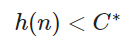

Donde C∗ es el costo del camino óptimo. Ya que la heurística es admisible, podemos garantizar que el algoritmo encontrará una solución óptima.

In [7]:
def h(state, goal,p=2):
    """Heurísitca euclideana"""
    x1,y1 = state
    x2,y2 = goal
    #Obtiene distancia euclideana
    dist = ((x2-x1)**p + (y2-y1)**p)**(1/p)

    return dist.real


## Creación del algoritmo A∗
Para crear el algoritmo necesitamos utilizar una pila de prioridad que tome el nodo con menor costo y menor heurística.

La pila de prioridad va a tomar como elemento de salida aquel que tenga la prioridad más alta. En general, esta prioridad se toma como el argumento que maximiza una función de prioridad. Sin embargo, como aquí estamos usando una métrica, lo ideal es que está sea lo más pequeña posible (que estemos más cerca de la meta). Por tanto, en lugar de tomar el elemento con el valor más grande, tomaremos el elemento con el valor más pequeño, que equivale a tomar aquel elemento que maximiza el valor menor de la heurística.

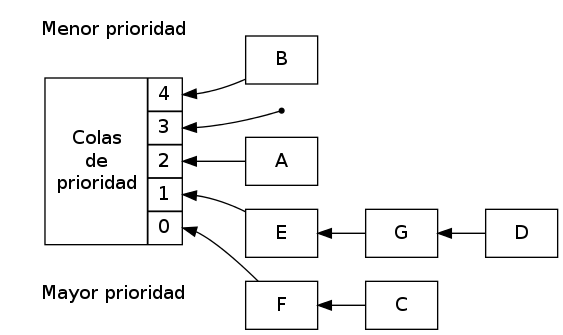



In [8]:
class PriorityQueue(object):
    """Clase de una cola de prioridad en los problemas de búsqueda."""
    def __init__(self,f=lambda x: 1):
        self.queue = []
        self.f = f

    def __str__(self):
        return ' '.join([str(q) for q in self.queue])

    def isEmpty(self):
        return self.queue == []

    def push(self, element):
        """Agrega elementos a la pila"""
        self.queue.append(element)

    def pop(self):
        """Saca de la pila el elemento con mayor valor f."""
        #Encuentra el elemento máximo en base al costo
        min_element = np.argmin([element.f for element in self.queue])
        #Guarda el elemento máximo
        item = self.queue[min_element]
        #Borra este elemento de la cola
        del self.queue[min_element]

        return item

## Nodo y expansión
Los nodos tendrán la misma estructura que hemos venido utilizando, guardando el costo y la función de prioridad f

Pero en el algoritmo de A∗ está función tomará en cuenta tanto el costo como la heurística. Podemos ver que entonces la función f estará dada como:

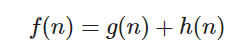

Donde g(n) es el costo del camino desde el nodo inicial hasta el nodo actual. Entonces, al crear el nuevo nodo tomaremos en cuenta esta forma de obtener los valores de f.



In [9]:
class Node(object):
    """Clase para crear nodos con sus atributos."""
    def __init__(self):
        self.state = (0,0)
        self.parent = None
        self.action = None
        self.cost = 0
        self.f = 0

    def __str__(self):
        if self.parent == None:
            return "State: {}".format(self.state)
        else:
            return "State: {}, Action: {}, Parent: {}".format(self.state,self.action,self.parent.state)

def expand(problem, node):
    """Función para expandir los nodos dado el problema"""
    s = node.state
    for action in problem.actions(s):
        #Aplica la función de resultado
        new_s = problem.result(s, action)
        #Crea el nuevo nodo
        new_node,new_node.state,new_node.parent,new_node.action = Node(),new_s,node,action
        #Agrega el costo
        new_node.cost = node.cost + problem.cost(s,action,new_s)
        #Agrega sólo la heurística al nodo
        new_node.f = new_node.cost + h(new_s, problem.goal)

        yield new_node

##Algoritmo  A∗
El algoritmo de A∗ es similar el algoritmo de dijkstra, extendiendo este al incorporar tanto la función de costo como al función heurística.



Inicialización:

* Se crea una lista vacía nodes para almacenar los nodos visitados durante la ejecución del algoritmo.
* Se crea un nodo node que representa el estado inicial del problema.
* Se establece el estado del nodo inicial como el estado inicial del problema.
* Se crea una cola de prioridad frontier que se utilizará para almacenar los nodos a explorar, ordenados por su costo estimado.


Bucle Principal:

* Se inicia un bucle mientras la frontera (frontier) no esté vacía.
* En cada iteración del bucle, se extrae el nodo de la frontera con menor costo estimado según la función de evaluación f = g + h (donde g es el costo real desde el nodo inicial hasta el nodo actual, y h es la heurística estimada desde el nodo actual hasta el objetivo).
* El nodo extraído se agrega a la lista nodes.


Verificación del Estado Objetivo:

* Se verifica si el estado del nodo extraído es igual al estado objetivo del problema.
* Si es así, se ha encontrado un camino óptimo, y la lista de nodos nodes se devuelve como resultado.


Expansión de Nodos:

* Si el estado no es el objetivo, se expande el nodo actual generando sus sucesores (hijos).
* Para cada hijo generado, se verifica si ya ha sido alcanzado (reached).
* Si no ha sido alcanzado o tiene un costo menor, se actualiza y se agrega a la frontera.

Finalización:

* Si la frontera se vacía y no se ha alcanzado el estado objetivo, se devuelve un mensaje de error indicando que no se logró llegar a un estado final.


En resumen, el algoritmo A* utiliza una combinación de búsqueda en profundidad y heurísticas para encontrar un camino óptimo desde el estado inicial hasta el estado objetivo en un problema dado. La cola de prioridad garantiza que los nodos con menor costo estimado se exploren primero. Este algoritmo es eficiente y proporciona una solución óptima si la heurística es admisible y consistente.

In [10]:
def AStar(problem):
    """Algoritmo A* para generar el camino más apto"""
    #Almacenamiento de nodos
    nodes = []
    #Nodo inicial
    node = Node()
    node.state = problem.initial
    #Frontera con cola de prioridad
    frontier = PriorityQueue()
    frontier.push(node)
    #Nodos alcanzados
    reached = {problem.initial:node}

    #Mientras la frontera no esté vacía
    while frontier.isEmpty() == False:
        #Pop en frontera
        node = frontier.pop()
        #Guarda el nodo en la lista
        nodes.append(node)
        #Actualiza el estado del problema
        problem.state = node.state

        #Si llega a un estado final se detiene
        #y regresa el camino de nodos
        if problem.state == problem.goal:
            return nodes

        #Expande el nodo actual
        expantion = expand(problem, node)
        for child in expantion:
            #Guarda estado de los hijos
            state = child.state
            #Guarda los hijos no alcanzados o que tengan menor costo
            if state not in reached.keys() or child.f < reached[state].f:
                reached[state] = child
                frontier.push(child)

    #Si no logra llegar a un nodo final
    #El algoritmo regresa mensaje de error
    return "No se ha logrado llegar a un estado final."

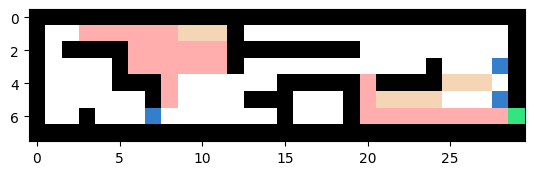

Solución


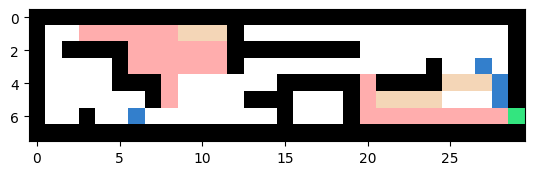

Costo total: 40


In [13]:
import numpy as np
tree = AStar(ent)

def get_path(search_tree, root):
    """Recupera la solución."""
    leaf = search_tree[::-1][0]
    parent = leaf.parent
    path = [leaf, parent]
    while parent.state != root:
        parent = parent.parent
        path.append(parent)

    return path[::-1]


ent.draw()

#Visualiza la solución
prev_s = ent.initial
for n in get_path(tree, ent.initial):
    ent.move(prev_s, n.state)
    prev_s = n.state

print('Solución')
ent.draw()
print('Costo total: {}'.format(tree[-1].cost))

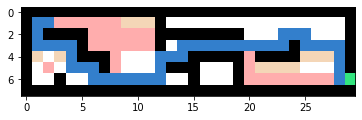